## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

soccer = pd.read_csv("results.csv")
soccer = soccer.reset_index()
soccer.rename(columns={'index':'game_index'}, inplace=True)
soccer.head()

,game_index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Unpivoting the data

In [3]:
soccer2 = soccer.melt(id_vars=['game_index','date', "tournament", "city", "country", "neutral","home_team", "away_team"], 
                      var_name='home_score', value_name = "score", value_vars=[ "home_score", "away_score"]).sort_values("date").reset_index(drop=True)
soccer2["team"] = [soccer2["home_team"][i] if soccer2["home_score"][i][0:4] == "home" else soccer2["away_team"][i] for i in soccer2.index]
soccer2["home"] = [x[0:4] for x in soccer2["home_score"]]
all_games = soccer2.drop(columns = ["home_score","home_team", "away_team"])
all_games['year'] = pd.DatetimeIndex(all_games['date']).year
all_games['month'] = pd.DatetimeIndex(all_games['date']).month
wcups = all_games[all_games["tournament"] == "FIFA World Cup"]

### Win vs Lose

In [4]:
all_games["result"] = "temp"
for i in all_games.game_index.unique():
    data_temp = all_games[all_games["game_index"]==i]
    a = data_temp.index[0]
    b = data_temp.index[1]
    #print(a)
    if(data_temp["score"][a] > data_temp["score"][b]):
        all_games.at[a,"result"] = "Win"
        all_games.at[b,"result"] = "Lose"
    elif(data_temp["score"][a] < data_temp["score"][b]):
        all_games.at[a,"result"] = "Lose"
        all_games.at[b,"result"] = "Win"
    else:
        all_games.at[a,"result"] = "Tie"
        all_games.at[b,"result"] = "Tie"

In [5]:
all_games.head(10)

,game_index,date,tournament,city,country,neutral,score,team,home,year,month,result
0,0,1872-11-30,Friendly,Glasgow,Scotland,False,0,Scotland,home,1872,11,Tie
1,0,1872-11-30,Friendly,Glasgow,Scotland,False,0,England,away,1872,11,Tie
2,1,1873-03-08,Friendly,London,England,False,4,England,home,1873,3,Win
3,1,1873-03-08,Friendly,London,England,False,2,Scotland,away,1873,3,Lose
4,2,1874-03-07,Friendly,Glasgow,Scotland,False,2,Scotland,home,1874,3,Win
5,2,1874-03-07,Friendly,Glasgow,Scotland,False,1,England,away,1874,3,Lose
6,3,1875-03-06,Friendly,London,England,False,2,England,home,1875,3,Tie
7,3,1875-03-06,Friendly,London,England,False,2,Scotland,away,1875,3,Tie
8,4,1876-03-04,Friendly,Glasgow,Scotland,False,3,Scotland,home,1876,3,Win
9,4,1876-03-04,Friendly,Glasgow,Scotland,False,0,England,away,1876,3,Lose


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [6]:
plot1 = wcups.groupby("team").sum().sort_values("score", ascending=False).head(5).reset_index()

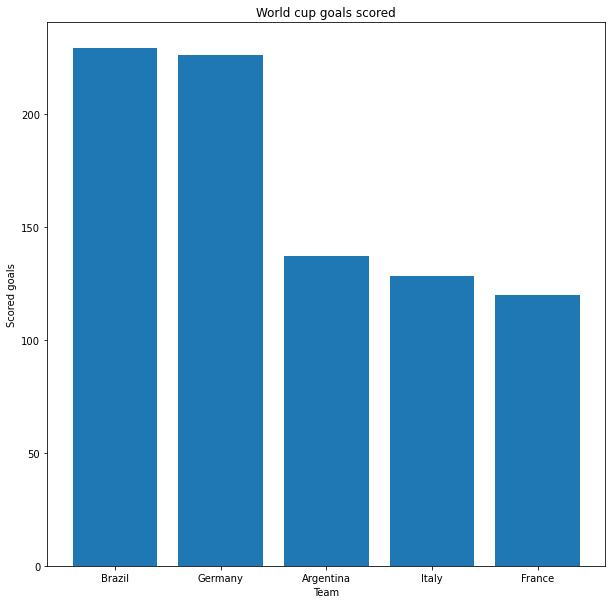

In [7]:
fig,ax = plt.subplots(figsize=(10,10))
ax.bar(plot1['team'], plot1['score'])
ax.set_xlabel('Team')
ax.set_ylabel('Scored goals')
ax.set_title('World cup goals scored')
plt.rcParams.update({'font.size': 10})
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [8]:
plot2 = all_games.groupby("tournament").nunique().sort_values("game_index", ascending=False).reset_index().head(10)
plot2

,tournament,game_index,date,city,country,neutral,score,team,home,year,month,result
0,Friendly,17029,9691,1644,257,2,16,266,2,134,12,3
1,FIFA World Cup qualification,7236,2087,713,223,2,21,219,2,49,12,3
2,UEFA Euro qualification,2582,651,283,61,2,14,58,2,37,12,3
3,African Cup of Nations qualification,1672,499,140,58,2,10,54,2,51,12,3
4,FIFA World Cup,900,355,161,17,2,11,81,2,21,3,3
5,Copa América,813,561,79,11,2,13,19,2,47,12,3
6,AFC Asian Cup qualification,724,355,94,44,2,16,50,2,25,12,3
7,African Cup of Nations,690,364,63,19,2,7,42,2,32,9,3
8,CECAFA Cup,620,389,33,11,2,11,17,2,39,7,3
9,CFU Caribbean Cup qualification,606,345,51,31,2,16,31,2,29,12,3


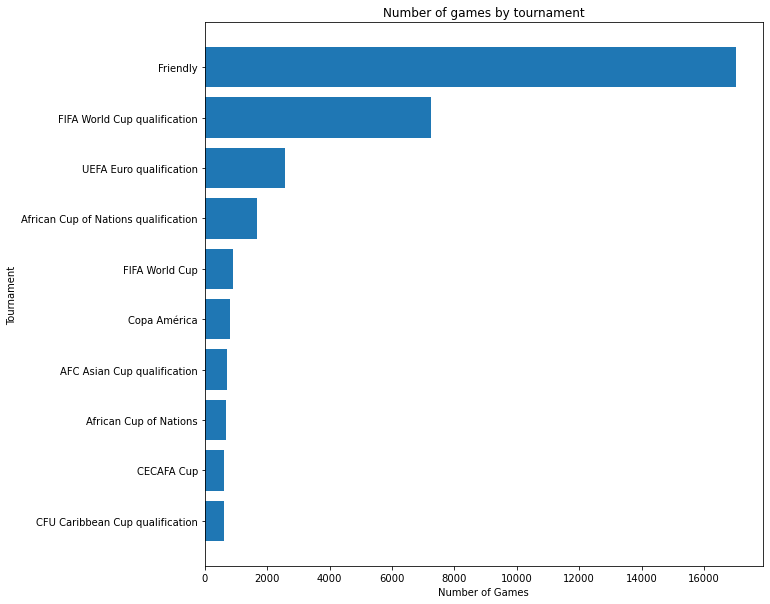

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
ax.barh(plot2['tournament'], plot2['game_index'])
ax.set_xlabel('Number of Games')
ax.set_ylabel('Tournament')
ax.set_title('Number of games by tournament')
plt.rcParams.update({'font.size': 15})
ax.invert_yaxis()
plt.show()

## Task 
Show the trend in number of matches per year.

In [10]:
plot3 = all_games.groupby("year").nunique().sort_values("year", ascending=True).reset_index()
plot3 = plot3[plot3["year"]!= 2020]
plot3

,year,game_index,date,tournament,city,country,neutral,score,team,home,month,result
0,1872,1,1,1,1,1,1,1,2,2,1,1
1,1873,1,1,1,1,1,1,2,2,2,1,2
2,1874,1,1,1,1,1,1,2,2,2,1,2
3,1875,1,1,1,1,1,1,1,2,2,1,1
4,1876,2,2,1,1,1,1,3,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
143,2015,1003,184,19,357,185,2,13,235,2,12,3
144,2016,926,148,20,361,188,2,12,222,2,12,3
145,2017,958,171,19,367,174,2,12,223,2,12,3
146,2018,905,153,16,366,174,2,14,231,2,12,3


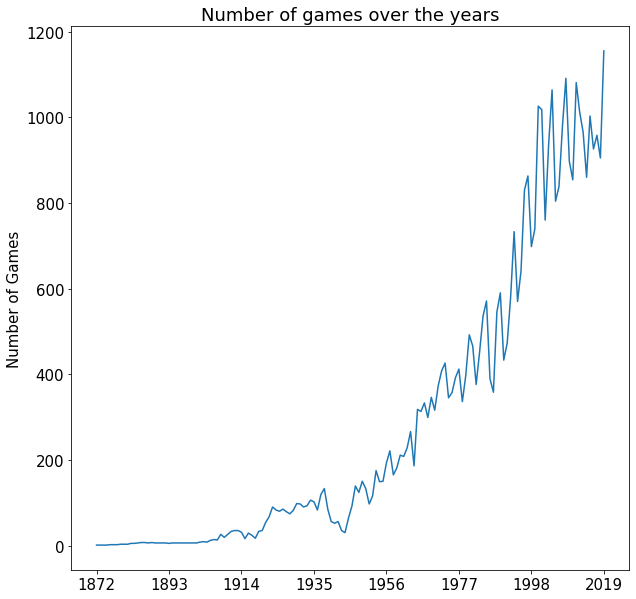

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(plot3['year'], plot3['game_index'])
ax.set_xlabel('')
ax.set_ylabel('Number of Games')
ax.set_title('Number of games over the years')
ax.set_xticks(np.round(np.linspace(1872,2019,8)))
plt.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [12]:
all_games.head()

,game_index,date,tournament,city,country,neutral,score,team,home,year,month,result
0,0,1872-11-30,Friendly,Glasgow,Scotland,False,0,Scotland,home,1872,11,Tie
1,0,1872-11-30,Friendly,Glasgow,Scotland,False,0,England,away,1872,11,Tie
2,1,1873-03-08,Friendly,London,England,False,4,England,home,1873,3,Win
3,1,1873-03-08,Friendly,London,England,False,2,Scotland,away,1873,3,Lose
4,2,1874-03-07,Friendly,Glasgow,Scotland,False,2,Scotland,home,1874,3,Win


In [13]:
results = all_games.groupby(["team","result"]).agg({"result":"count"})
results_perc = results.groupby(level=0).apply(lambda x:
                                    100 * x / float(x.sum()))
results_perc = results_perc.reset_index(level=0, drop=False)
results_perc.rename(columns={'result':'percent'}, inplace=True)
results_perc = results_perc.reset_index()
results_perc.head()

,result,team,percent
0,Lose,Abkhazia,14.285714
1,Tie,Abkhazia,42.857143
2,Win,Abkhazia,42.857143
3,Lose,Afghanistan,51.351351
4,Tie,Afghanistan,21.621622


In [14]:
perc_win = results_perc[results_perc.result == "Win"].sort_values("percent", ascending=False).head(10)
perc_win

,result,team,percent
751,Win,Surrey,100.000000
47,Win,Asturias,100.000000
138,Win,Canary Islands,75.000000
880,Win,Yorkshire,71.428571
587,Win,Padania,67.441860
404,Win,Jersey,67.073171
194,Win,County of Nice,66.666667
608,Win,Parishes of Jersey,66.666667
73,Win,Basque Country,64.912281
106,Win,Brazil,63.710499


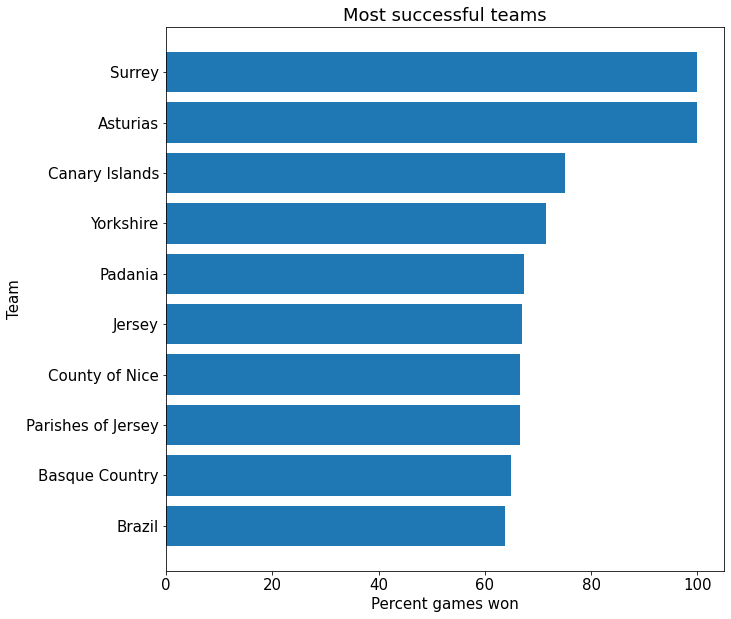

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
ax.barh(perc_win['team'], perc_win['percent'])
ax.set_xlabel('Percent games won')
ax.set_ylabel('Team')
ax.set_title('Most successful teams')
ax.invert_yaxis()
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [16]:
perc_lose = results_perc[results_perc.result == "Lose"].sort_values("percent", ascending=False).head(20)
perc_lose

,result,team,percent
218,Lose,Darfur,100.000000
682,Lose,Sark,100.000000
467,Lose,Madrid,100.000000
662,Lose,Saint Helena,100.000000
555,Lose,Niue,100.000000
672,Lose,Saint Pierre and Miquelon,100.000000
483,Lose,Manchukuo,100.000000
591,Lose,Palau,100.000000
679,Lose,San Marino,96.932515
784,Lose,Tibet,92.307692


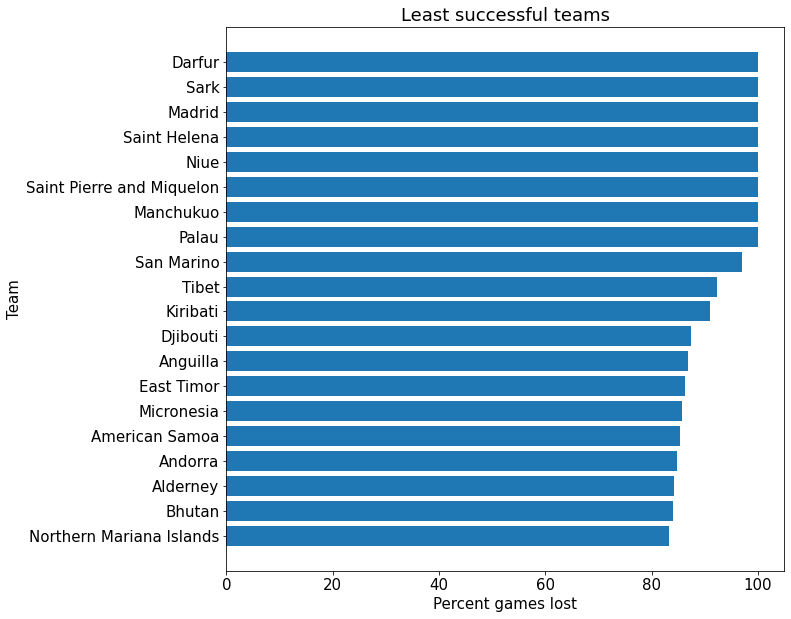

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
ax.barh(perc_lose['team'], perc_lose['percent'])
ax.set_xlabel('Percent games lost')
ax.set_ylabel('Team')
ax.set_title('Least successful teams')
ax.invert_yaxis()
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [18]:
plot_month = all_games.groupby("month").nunique().sort_values("month", ascending=True).reset_index()
plot_month

,month,game_index,date,tournament,city,country,neutral,score,team,home,year,result
0,1,2218,1080,43,395,149,2,13,195,2,99,3
1,2,2564,1054,47,535,190,2,15,224,2,134,3
2,3,4039,1395,49,728,232,2,16,232,2,141,3
3,4,2538,1083,43,540,205,2,18,231,2,130,3
4,5,3231,1458,52,687,217,2,15,260,2,117,3
5,6,5969,1671,58,933,227,2,19,299,2,112,3
6,7,2770,1277,56,529,205,2,18,246,2,109,3
7,8,2752,1142,45,601,209,2,20,235,2,113,3
8,9,4296,1183,50,746,235,2,20,240,2,114,3
9,10,4642,1345,48,733,226,2,15,234,2,116,3


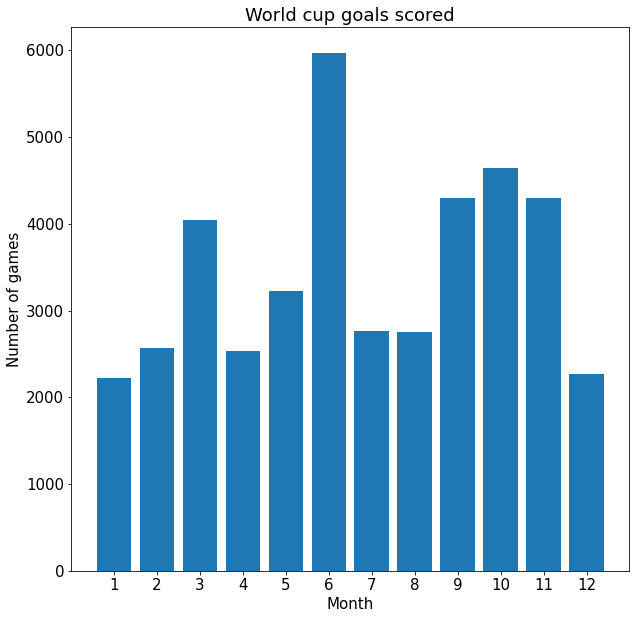

In [19]:
fig,ax = plt.subplots(figsize=(10,10))
ax.bar(plot_month['month'], plot_month['game_index'])
ax.set_xlabel('Month')
ax.set_ylabel('Number of games')
ax.set_title('World cup goals scored')
plt.rcParams.update({'font.size': 15})
plt.xticks(np.arange(1, 13, 1))
plt.show()

## Task
Which teams played against each other the most?

In [20]:
crosstable = pd.DataFrame(np.zeros((n, n)))
crosstable.columns = teams
crosstable.index = teams
crosstable

NameError: name 'n' is not defined

In [ ]:
team_vs = soccer[["home_team","away_team"]]
team_vs.head()
teams = team_vs["home_team"].append(team_vs["away_team"]).unique()
n=len(teams)

crosstable = pd.DataFrame(np.zeros((n, n)))
crosstable.columns = teams
crosstable.index = teams


In [ ]:
for i in soccer.index:
    #if(i % 1000 == 0):
        #print(i)
    team_a = soccer["home_team"][i]
    team_b = soccer["away_team"][i]
    crosstable.at[team_a,team_b] += 1

In [ ]:
df_counts = pd.DataFrame(np.zeros((0, 2)))
name_list = []
count = []
for i in range(len(teams)):
    for j in range(len(teams)):
        if(i<j):
            crosstable.iloc[i,j] = crosstable.iloc[i,j] + crosstable.iloc[j,i]
            crosstable.iloc[j,i] = 0
            string_temp = teams[i] +"-"+ teams[j]
            name_list.append(string_temp)
            count.append(crosstable.iloc[i,j])
            

In [ ]:
d = {'name_list':name_list,'count':count}
counts_df = pd.DataFrame(d)
counts_df = counts_df.sort_values("count", ascending=False).head(10)


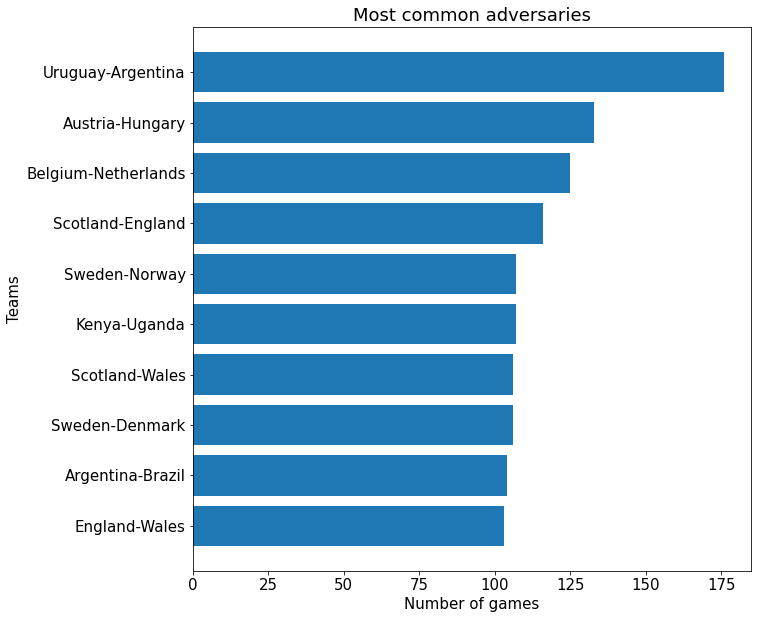

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.barh(counts_df['name_list'], counts_df['count'])
ax.set_xlabel('Number of games')
ax.set_ylabel('Teams')
ax.set_title('Most common adversaries')
ax.invert_yaxis()
plt.show()

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.